# Linear Regression with Multiple variables

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
datafile = '/home/balerion/Desktop/leetcode_Ai/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex1/data/ex1data2.txt'

cols = np.loadtxt(datafile , delimiter=','  ,usecols=(0,1,2) , unpack=True)
X = np.transpose(np.array(cols[:-1]))
Y = np.transpose(np.array(cols[-1:]))
m = Y.size # m = X[:,1].size
# print(m)

#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)
# print(X[:,0])

Quick Visualisation of data

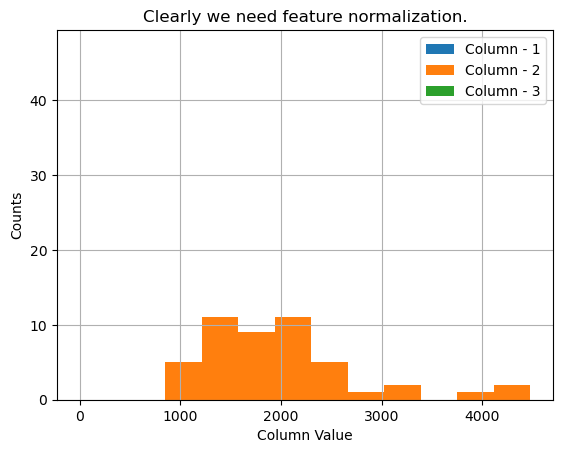

In [21]:
plt.grid(True)
plot_ = plt.hist(X[:,0] , label = "Column - 1")
plot_ = plt.hist(X[:,1] , label = "Column - 2")
plot_ = plt.hist(X[:,2] , label = "Column - 3")
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.legend()
# plt.show()

# Normalization or Standardization of Dataset

Feature normalizing the columns (subtract mean, divide by standard deviation)












### Basic Fn for normalizing dataset

In [ ]:
# def feature_normalize(X):

#     # Normalizes the features in X.
#     # Returns a tuple (X_norm, mu, sigma) where:
#     # X_norm is the normalized version of X,
#     # mu is the mean of each feature,
#     # sigma is the standard deviation of each feature.
    
#     mu = np.mean(X, axis=0)
#     sigma = np.std(X, axis=0)
#     X_norm = (X - mu) / sigma
#     return X_norm, mu, sigma

In [28]:
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))

# print(stored_feature_means)
    #Skip the first column
    if not icol: continue
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]
    
    # print(Xnorm)

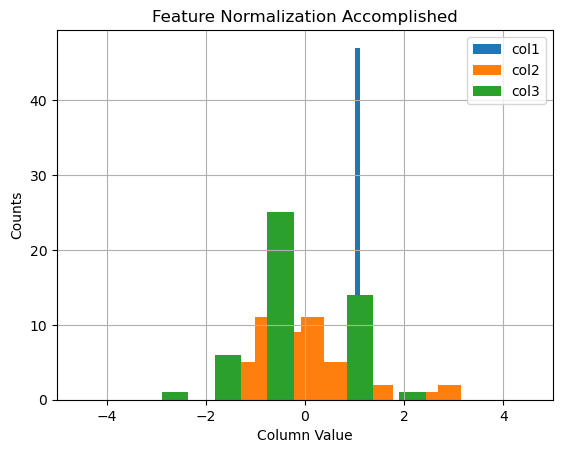

In [29]:
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

## Running Gradient Descent for multiple variable

Initial theta still set to zeros
(Note! This doesn't work unless we feature normalize!)

### "overflow encountered in multiply"

When features have large values, the intermediate calculations in gradient descent can become very large, leading to overflow. This is why feature normalization is crucial.
